In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib.dates as mdates
import plotly.express as px
from plotly.subplots import make_subplots
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 5000)
%matplotlib inline

In [6]:
path_to_protocol5='dataset_\dataset_cleaned_popularity.pkl'

In [7]:
  df = pd.read_pickle(path_to_protocol5)

In [8]:
df.drop(columns=['index', 'level_0'], inplace=True)
df.reset_index(drop=True, inplace=True)

In [9]:
df.head(5)

,country,uri,popularity,title,artist,release_type,sub_genre,artist_followers,explicit,album,release_date,track_number,tracks_in_album,danceability,energy,key,loudness,mode,speechiness,acoustics,instrumentalness,liveness,valence,tempo,time_signature,genre,days_since_release,released_after_2017,explicit_false,explicit_true,popu_max,top10_dummy,top50_dummy,cluster,duration_min,release_year,release_month,release_day
0,Global,https://open.spotify.com/track/6FyRXC8tJUh863J...,31833.95,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,2018-11-05,1,1,0.767,0.709,1,-4.47,1,0.336,0.323,0.0,0.0676,0.72,171.993,4,hip hop,740.0,1.0,1,0,10,1.0,1.0,global,4.31065,2018,11,5
1,USA,https://open.spotify.com/track/6FyRXC8tJUh863J...,8.00,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,2018-11-05,1,1,0.767,0.709,1,-4.47,1,0.336,0.323,0.0,0.0676,0.72,171.993,4,hip hop,740.0,1.0,1,0,191,0.0,0.0,english speaking and nordic,4.31065,2018,11,5
2,Argentina,https://open.spotify.com/track/6FyRXC8tJUh863J...,76924.40,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,2018-11-05,1,1,0.767,0.709,1,-4.47,1,0.336,0.323,0.0,0.0676,0.72,171.993,4,hip hop,740.0,1.0,1,0,1,1.0,1.0,spanish speaking,4.31065,2018,11,5
3,Belgium,https://open.spotify.com/track/6FyRXC8tJUh863J...,849.60,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,2018-11-05,1,1,0.767,0.709,1,-4.47,1,0.336,0.323,0.0,0.0676,0.72,171.993,4,hip hop,740.0,1.0,1,0,126,0.0,0.0,english speaking and nordic,4.31065,2018,11,5
4,Switzerland,https://open.spotify.com/track/6FyRXC8tJUh863J...,20739.10,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,2018-11-05,1,1,0.767,0.709,1,-4.47,1,0.336,0.323,0.0,0.0676,0.72,171.993,4,hip hop,740.0,1.0,1,0,21,0.0,1.0,english speaking and nordic,4.31065,2018,11,5


In [10]:
key_mapping = {0:"C",1:"C#,Db",2:"D",3:"D#,Eb",4:"E",5:"F",6:"F#,Gb",7:"G",8:"G#,Ab",9:"A",10:"A#,Bb",11:"B"}
df['mapped_key'] = df['key'].map(key_mapping)


In [11]:
df.head(5)

,country,uri,popularity,title,artist,release_type,sub_genre,artist_followers,explicit,album,release_date,track_number,tracks_in_album,danceability,energy,key,loudness,mode,speechiness,acoustics,instrumentalness,liveness,valence,tempo,time_signature,genre,days_since_release,released_after_2017,explicit_false,explicit_true,popu_max,top10_dummy,top50_dummy,cluster,duration_min,release_year,release_month,release_day,mapped_key
0,Global,https://open.spotify.com/track/6FyRXC8tJUh863J...,31833.95,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,2018-11-05,1,1,0.767,0.709,1,-4.47,1,0.336,0.323,0.0,0.0676,0.72,171.993,4,hip hop,740.0,1.0,1,0,10,1.0,1.0,global,4.31065,2018,11,5,"C#,Db"
1,USA,https://open.spotify.com/track/6FyRXC8tJUh863J...,8.00,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,2018-11-05,1,1,0.767,0.709,1,-4.47,1,0.336,0.323,0.0,0.0676,0.72,171.993,4,hip hop,740.0,1.0,1,0,191,0.0,0.0,english speaking and nordic,4.31065,2018,11,5,"C#,Db"
2,Argentina,https://open.spotify.com/track/6FyRXC8tJUh863J...,76924.40,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,2018-11-05,1,1,0.767,0.709,1,-4.47,1,0.336,0.323,0.0,0.0676,0.72,171.993,4,hip hop,740.0,1.0,1,0,1,1.0,1.0,spanish speaking,4.31065,2018,11,5,"C#,Db"
3,Belgium,https://open.spotify.com/track/6FyRXC8tJUh863J...,849.60,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,2018-11-05,1,1,0.767,0.709,1,-4.47,1,0.336,0.323,0.0,0.0676,0.72,171.993,4,hip hop,740.0,1.0,1,0,126,0.0,0.0,english speaking and nordic,4.31065,2018,11,5,"C#,Db"
4,Switzerland,https://open.spotify.com/track/6FyRXC8tJUh863J...,20739.10,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,2018-11-05,1,1,0.767,0.709,1,-4.47,1,0.336,0.323,0.0,0.0676,0.72,171.993,4,hip hop,740.0,1.0,1,0,21,0.0,1.0,english speaking and nordic,4.31065,2018,11,5,"C#,Db"


In [12]:
df.columns

Index(['country', 'uri', 'popularity', 'title', 'artist', 'release_type',
       'sub_genre', 'artist_followers', 'explicit', 'album', 'release_date',
       'track_number', 'tracks_in_album', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acoustics', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature', 'genre',
       'days_since_release', 'released_after_2017', 'explicit_false',
       'explicit_true', 'popu_max', 'top10_dummy', 'top50_dummy', 'cluster',
       'duration_min', 'release_year', 'release_month', 'release_day',
       'mapped_key'],
      dtype='object')

In [13]:
df.country.unique()

array(['Global', 'USA', 'Argentina', 'Belgium', 'Switzerland', 'Chile',
       'Colombia', 'Costa Rica', 'Germany', 'Ecuador', 'Spain', 'Italy',
       'Mexico', 'Peru', 'Portugal', 'Taiwan', 'UK', 'Austria',
       'Australia', 'Canada', 'Finland', 'France', 'Indonesia', 'Ireland',
       'Malaysia', 'Netherlands', 'Norway', 'New Zealand', 'Philippines',
       'Poland', 'Sweden', 'Singapore', 'Turkey', 'Brazil', 'Denmark'],
      dtype=object)

In [14]:
order = df.groupby(["country"])["popularity"].mean().sort_values().index

In [15]:
unique_countries = df["country"].unique()
unique_countries = unique_countries[unique_countries != "Global"]
unique_countries

array(['USA', 'Argentina', 'Belgium', 'Switzerland', 'Chile', 'Colombia',
       'Costa Rica', 'Germany', 'Ecuador', 'Spain', 'Italy', 'Mexico',
       'Peru', 'Portugal', 'Taiwan', 'UK', 'Austria', 'Australia',
       'Canada', 'Finland', 'France', 'Indonesia', 'Ireland', 'Malaysia',
       'Netherlands', 'Norway', 'New Zealand', 'Philippines', 'Poland',
       'Sweden', 'Singapore', 'Turkey', 'Brazil', 'Denmark'], dtype=object)

In [16]:
from geopy.geocoders import Nominatim

latitude = []
longitude = []
geolocator = Nominatim(user_agent="my-app")

for i in unique_countries:
    location = geolocator.geocode(i)
    latitude.append(location.latitude)
    longitude.append(location.longitude)

ModuleNotFoundError: No module named 'geopy'

In [ ]:
import folium
 
data = pd.DataFrame({
   'lat':latitude,
   'lon':longitude,
   'name':unique_countries,
    'value':[20.0]*34
})
 
m = folium.Map(location=[20,0], tiles="OpenStreetMap", zoom_start=2)
 
    
for i in range(0,len(data)):
    folium.Circle(
      location=[data.iloc[i]['lat'], data.iloc[i]['lon']],
      popup=data.iloc[i]['name'],
      radius=data.iloc[i]['value']*10000,
      color='#1db954',
      fill=True,
      fill_color='#1db954'
   ).add_to(m)
    
m

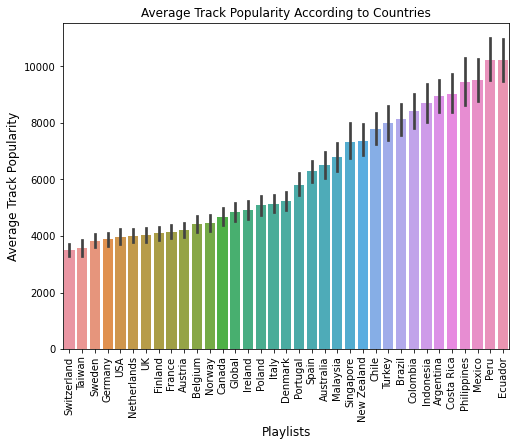

In [23]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=df, y="popularity", x="country", estimator=np.mean, order=order)
plt.title('Average Track Popularity According to Countries')
plt.ylabel("Average Track Popularity", fontsize = 12)
plt.xlabel("Playlists", fontsize = 12)
ax.tick_params(axis='x', rotation=90)


In [ ]:
fig = px.treemap(df,path=['country','genre'],values=df['popularity'])

fig.show()

In [ ]:
ecuador = df[df['country']=='Ecuador']
peru = df[df['country']=='Peru']
mexico = df[df['country']=='Mexico']

poland = df[df['country']=='Poland']
italy = df[df['country']=='Italy']
denmark = df[df['country']=='Denmark']


switzerland = df[df['country']=='Switzerland']
taiwan = df[df['country']=='Taiwan']
sweden = df[df['country']=='Sweden']



In [ ]:
fig1 = px.bar(x=ecuador.groupby('genre').size().sort_values(ascending=False)[:5].index,y=ecuador.groupby('genre').size().sort_values(ascending=False)[:5].values)
fig2= px.bar(x=ecuador.groupby('sub_genre').size().sort_values(ascending=False)[:5].index,y=ecuador.groupby('sub_genre').size().sort_values(ascending=False)[:5].values)
fig3= px.bar(x=ecuador.groupby('artist').size().sort_values(ascending=False)[:5].index,y=ecuador.groupby('artist').size().sort_values(ascending=False)[:5].values)
fig4= px.bar(x=ecuador.groupby('mapped_key').size().sort_values(ascending=False)[:5].index,y=ecuador.groupby('mapped_key').size().sort_values(ascending=False)[:5].values)

#getting the traces out of it.
trace1 = fig1['data'][0]
trace2 = fig2['data'][0]
trace3 = fig3['data'][0]
trace4 = fig4['data'][0]

#making a subplot having two rows and two columns.
fig = make_subplots(rows = 1, cols =4 , shared_xaxes = False,subplot_titles=("Most Occurring Genres in Ecuador", "Most Occurring Subgenres in Ecuador", "Most Occurring Artist in Ecuador", "Most Occurring Keys in Ecuador"))

#adding traces in the figure
fig.add_trace(trace1, row = 1, col = 1)
fig.add_trace(trace2, row = 1, col = 2)
fig.add_trace(trace3, row = 1, col = 3)
fig.add_trace(trace4, row = 1, col = 4)
fig.update_layout(height=400, width=1600,plot_bgcolor='#F5FFFA')


fig.show()

In [ ]:
fig1 = px.bar(x=denmark.groupby('genre').size().sort_values(ascending=False)[:5].index,y=denmark.groupby('genre').size().sort_values(ascending=False)[:5].values)
fig2= px.bar(x=denmark.groupby('sub_genre').size().sort_values(ascending=False)[:5].index,y=denmark.groupby('sub_genre').size().sort_values(ascending=False)[:5].values)
fig3= px.bar(x=denmark.groupby('artist').size().sort_values(ascending=False)[:5].index,y=denmark.groupby('artist').size().sort_values(ascending=False)[:5].values)
fig4= px.bar(x=denmark.groupby('mapped_key').size().sort_values(ascending=False)[:5].index,y=denmark.groupby('mapped_key').size().sort_values(ascending=False)[:5].values)

#getting the traces out of it.
trace1 = fig1['data'][0]
trace2 = fig2['data'][0]
trace3 = fig3['data'][0]
trace4 = fig4['data'][0]

#making a subplot having two rows and two columns.
fig = make_subplots(rows = 1, cols =4 , shared_xaxes = False,subplot_titles=("Most Occurring Genres in Denmark", "Most Occurring Subgenres in Denmark", "Most Occurring Artist in Denmark", "Most Occurring Keys in Denmark"))

#adding traces in the figure
fig.add_trace(trace1, row = 1, col = 1)
fig.add_trace(trace2, row = 1, col = 2)
fig.add_trace(trace3, row = 1, col = 3)
fig.add_trace(trace4, row = 1, col = 4)
fig.update_layout(height=400, width=1600,plot_bgcolor='#F5FFFA')


fig.show()

In [ ]:
fig1 = px.bar(x=switzerland.groupby('genre').size().sort_values(ascending=False)[:5].index,y=switzerland.groupby('genre').size().sort_values(ascending=False)[:5].values)
fig2= px.bar(x=switzerland.groupby('sub_genre').size().sort_values(ascending=False)[:5].index,y=switzerland.groupby('sub_genre').size().sort_values(ascending=False)[:5].values)
fig3= px.bar(x=switzerland.groupby('artist').size().sort_values(ascending=False)[:5].index,y=switzerland.groupby('artist').size().sort_values(ascending=False)[:5].values)
fig4= px.bar(x=switzerland.groupby('mapped_key').size().sort_values(ascending=False)[:5].index,y=switzerland.groupby('mapped_key').size().sort_values(ascending=False)[:5].values)

#getting the traces out of it.
trace1 = fig1['data'][0]
trace2 = fig2['data'][0]
trace3 = fig3['data'][0]
trace4 = fig4['data'][0]

#making a subplot having two rows and two columns.
fig = make_subplots(rows = 1, cols =4 , shared_xaxes = False,subplot_titles=("Most Occurring Genres in Switzerland", "Most Occurring Subgenres in Switzerland", "Most Occurring Artist in Switzerland","Most Occurring Keys in Switzerland"))

#adding traces in the figure
fig.add_trace(trace1, row = 1, col = 1)
fig.add_trace(trace2, row = 1, col = 2)
fig.add_trace(trace3, row = 1, col = 3)
fig.add_trace(trace4, row = 1, col = 4)
fig.update_layout(height=400, width=1600,plot_bgcolor='#F5FFFA')


fig.show()

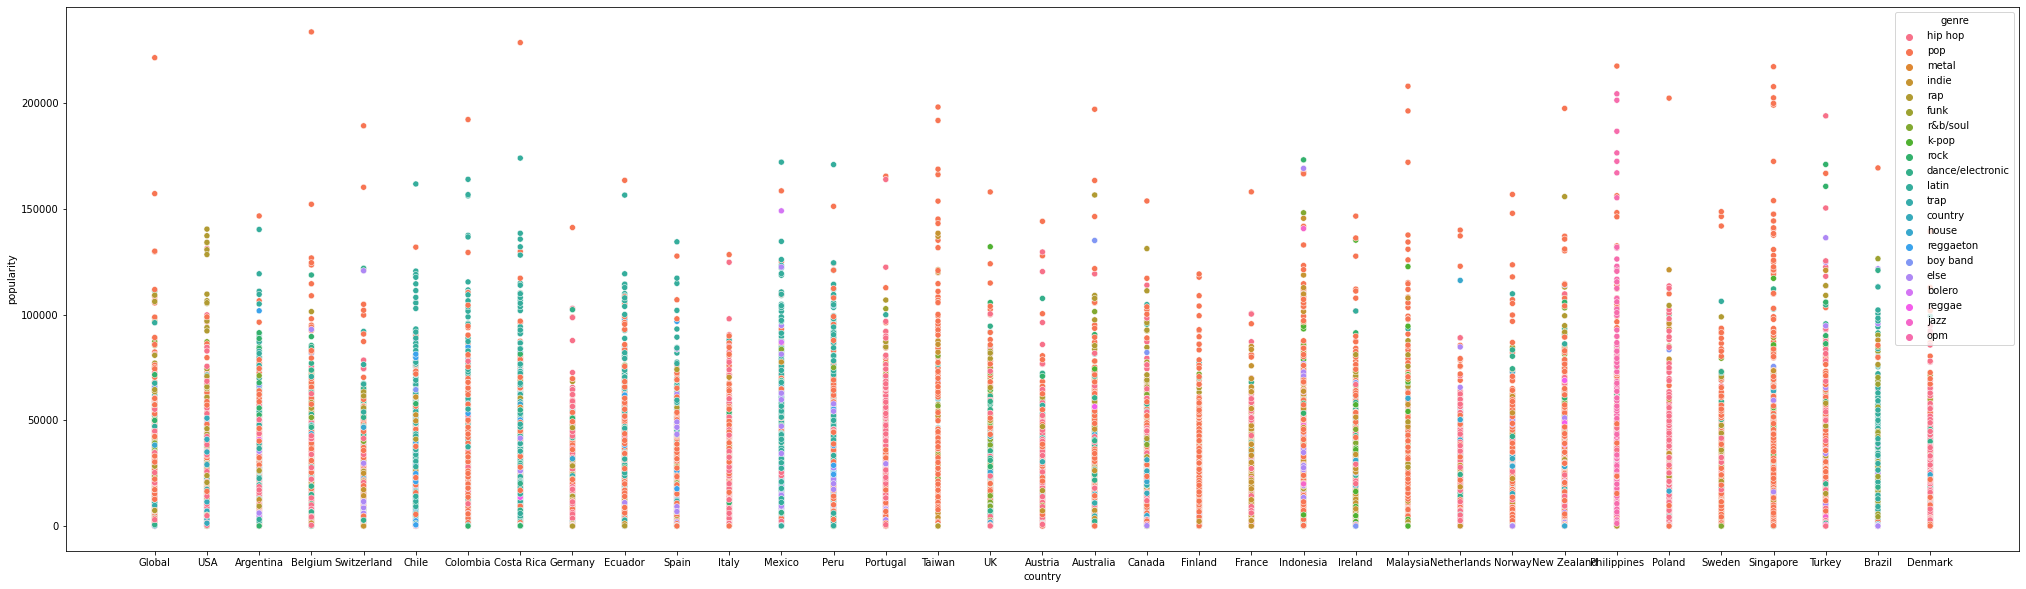

In [ ]:
plt.figure(figsize=(35, 10))
sns.scatterplot(x='country', y='popularity', data=df, hue='genre', estimator=np.sum)

In [ ]:
fig = px.treemap(df,path=['country', 'key'],values=df['popularity'])

fig.show()

In [ ]:
fig = px.treemap(df,path=['genre', 'artist'],values=df['popularity'])

fig.show()